In [5]:
from sklearn import datasets  # Import the sklearn datasets module
from sklearn.model_selection import train_test_split
import matplotlib as mpl      # Plotting tools
mpl.rcParams['figure.figsize'] = [18,15]
mpl.rcParams['font.size'] = 18
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(53)

#Load the dataset
iris = datasets.load_iris()
x = iris.data 
y = iris.target

# print('x.shape', x.shape)
# print('x', x)
# print('y.shape', y.shape)
# print('y', y)

x,x_test,y,y_test =  train_test_split(x,y)
# print('x.shape', x.shape)
# print('x', x)
# print('x_test.shape', x_test.shape)
# print('x_test', x_test)
# print('y.shape', y.shape)
# print('y', y)
# print('y_test.shape', y_test.shape)
# print('y_test', y_test)

m = x.shape[0]
n = x.shape[1]
N = 3

# Design matrix
Phi = np.hstack((x,np.ones((x.shape[0],1))))
# print('shape', Phi.shape)
# print('Phi', Phi)


# Function to convert categorical labels into one-hot matrix.
def convert_to_one_hot(y,n_classes):
    T = np.zeros((y.shape[0],n_classes))
    for t,yy in zip(T,y):
        t[yy]=1   
    return T
T = convert_to_one_hot(y,N)

# print('T.shape', T.shape)
# print('T', T)


In [7]:
def softmax(A):
    numerator = np.exp(A)
    denominator = numerator.sum(axis=1)
    return numerator/denominator[:,np.newaxis]

In [10]:
W = np.random.randn(n+1,N)
# print('W.shape', W.shape)
# print('W', W)
A = Phi @ W

def L(T,S):
    return -np.sum(T*np.log(S))

def gradient(y_obs,y_pred,Phi):
    return - Phi.T @ (T - S)

S = softmax(Phi@W)
# print('S.shape', S.shape)
# print('S', S)
print("Categorical Cross Entropy:",L(T,S))
print("Gradient with respect to W:", gradient(T,S,Phi))

Categorical Cross Entropy: 850.3816396157334
Gradient with respect to W: [[-201.24629458 -200.05329876  401.29959334]
 [-139.16255099  -93.56771298  232.73026397]
 [ -58.18457326 -143.38681629  201.57138954]
 [  -9.79765116  -44.39786731   54.19551847]
 [ -39.98892084  -33.99036918   73.97929002]]


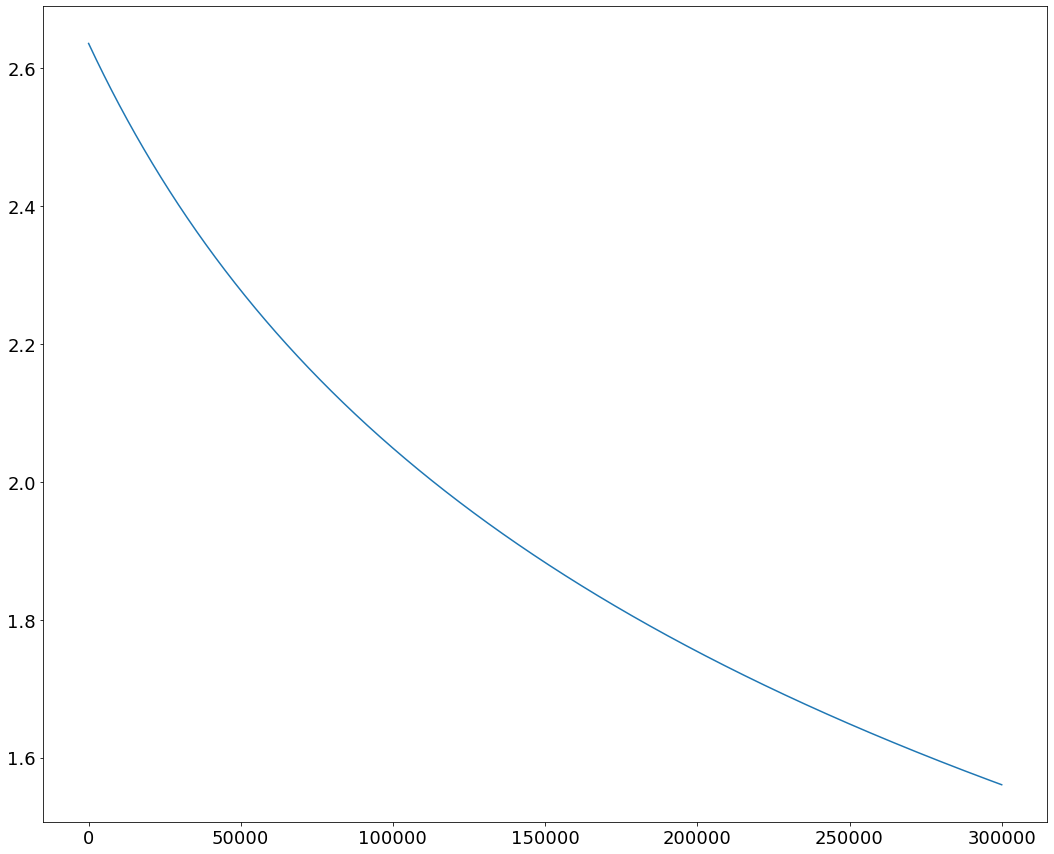

In [13]:
eta = 3e-4
L_record = []
for t in range(300000):
    L_record.append(L(T,S))
    S = softmax(Phi@W)
    g = gradient(T,S,Phi)
    W -= eta*g

plt.plot(L_record)

In [14]:
y_pred = np.argmax(S,axis=1)
# print('y_pred.shape', y_pred.shape)
# print('y_pred', y_pred)
print('Training set accuracy:',np.sum(y_pred == y)/len(y))

y_pred.shape (112,)
y_pred [1 2 2 0 1 2 2 1 0 1 2 0 0 0 0 0 2 2 1 0 0 2 2 0 0 2 1 1 0 1 2 1 0 0 0 1 2
 0 0 2 0 2 0 1 1 2 0 1 1 2 2 1 2 2 2 0 2 2 2 1 0 1 2 0 1 1 1 0 1 2 2 2 1 2
 2 1 0 2 1 1 1 1 0 0 2 2 0 1 1 0 0 0 2 0 0 0 1 0 0 1 2 0 1 2 2 1 0 2 1 2 0
 0]
Training set accuracy: 1.0


In [16]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x, y)
y_pred_nb = clf.predict(x)
print(np.sum(y_pred_nb == y)/len(y))


0.9553571428571429


In [17]:
Phi_test = np.hstack((x_test,np.ones((x_test.shape[0],1))))
# print('Phi_test.shape', Phi_test.shape)
# print('Phi_test', Phi_test)
S_test = softmax(Phi_test@W)
y_pred_test = np.argmax(S_test,axis=1)
print('Test set accuracy (softmax):', sum(y_pred_test==y_test)/len(y_test))
y_pred_test_nb = clf.predict(x_test)
print('Test set accuracy (naive Bayes):', sum(y_pred_test_nb==y_test)/len(y_test))

Test set accuracy (softmax): 0.9473684210526315
Test set accuracy (naive Bayes): 0.9210526315789473


In [8]:
from sklearn.metrics import confusion_matrix
print('y_pred_test', y_pred_test)
print('y_test', y_test)
confusion_matrix(y_pred_test,y_test)

y_pred_test [0 0 2 1 1 2 2 0 1 2 0 1 2 0 2 1 1 2 2 0 2 2 1 0 1 0 0 1 2 0 2 1 1 1 2 2 1
 1]
y_test [0 0 2 1 1 2 2 0 1 2 0 1 1 0 2 1 1 2 2 0 1 2 1 0 1 0 0 1 2 0 2 1 1 1 2 2 1
 1]


array([[10,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 12]], dtype=int64)